**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name:           Arda Barak<br/>
Student Number: 300129340 

Name: <br/>
Student Number:

## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [ ]:
#import statements 
try:
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import cross_val_score
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.dummy import DummyClassifier
    from sklearn.tree import DecisionTreeClassifier
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import Input
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
    from sklearn.metrics import precision_recall_fscore_support
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    import seaborn as sns
    import matplotlib.pyplot as plt
    from keras.models import Sequential
    from keras.layers import Dense, Input
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.callbacks import EarlyStopping

except:
    %pip install pandas 
    %pip install scikit-learn
    %pip install tensorflow  
    
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import cross_val_score
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.dummy import DummyClassifier
    from sklearn.tree import DecisionTreeClassifier
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import Input
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
    from sklearn.metrics import precision_recall_fscore_support
    from sklearn.model_selection import GridSearchCV
    import seaborn as sns
    import matplotlib.pyplot as plt
    from keras.models import Sequential
    from keras.layers import Dense, Input
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.callbacks import EarlyStopping

sns.set_style("darkgrid")

In [2]:
# initializations
#test
testURL = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv"
testDataSet = pd.read_csv(testURL)
#train      
trainURL = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv"
trainDataSet = pd.read_csv(trainURL)
#validate   
validateURL = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv"
validateDataSet = pd.read_csv(validateURL)

In [3]:
testDataSet.head()

,2,0,0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,...,0.409,0.410,0.411,0.375.3,0.412,0.413,0.414,0.415,0.416,0.417
0,1,0.1111,0.0,0.0000,0.0000,0.2222,0.1111,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0,0.0,0.0000,0.0
1,1,0.3750,0.0,0.0625,0.0000,0.0312,0.0312,0.0625,0.0312,0.0,...,0.0312,0.0312,0.0312,0.0312,0.0000,0.0625,0.0,0.0,0.0000,0.0
2,1,0.4516,0.0,0.0000,0.0000,0.0000,0.2742,0.0000,0.0806,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0161,0.0
3,0,0.0000,0.0,0.0625,0.0312,0.0000,0.7500,0.0000,0.0000,0.0,...,0.0938,0.0000,0.1562,0.1250,0.0000,0.0312,0.0,0.0,0.0000,0.0
4,2,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.1333,0.1333,0.1333,0.0000,0.0667,0.0667,0.0,0.0,0.0000,0.0


In [4]:
trainDataSet.head()

,2,0,0.0556,0.1,0.0556.1,0.1111,0.2,0.0556.2,0.3,0.4,...,0.1667.17,0.2222.12,0.295,0.296,0.1667.18,0.297,0.298,0.299,0.300,0.301
0,2,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0
1,2,0.1905,0.0,0.3333,0.0000,0.0,0.0000,0.0000,0.0000,0.2857,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.1905,0.381,0.0
2,2,0.0225,0.0,0.0112,0.1348,0.0,0.0112,0.1348,0.0112,0.1685,...,0.0,0.0787,0.0674,0.0112,0.0225,0.1573,0.0,0.0225,0.000,0.0
3,2,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0000,0.6667,0.0000,0.0000,0.0,0.0000,0.000,0.0
4,0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.3333,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0


In [5]:
validateDataSet.head()

,2,0.05,0,0.4,0.6,0.10,0.1,0.11,0.35,0.12,...,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355
0,0,0.0090,0.018,0.0360,0.0450,0.0000,0.0270,0.0991,0.0090,0.0090,...,0.0270,0.0270,0.0270,0.0180,0.0360,0.5856,0.0,0.0000,0.0000,0.0
1,2,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,...,0.0000,0.0000,0.0000,0.0000,0.6667,0.1667,0.0,0.0000,0.0000,0.0
2,2,0.6341,0.000,0.0000,0.0000,0.0488,0.0976,0.0000,0.0122,0.0122,...,0.0488,0.1341,0.0732,0.0610,0.0000,0.0366,0.0,0.0122,0.0000,0.0
3,2,0.0000,0.000,0.0000,0.0714,0.0000,0.0714,0.0000,0.0714,0.1429,...,0.0000,0.0714,0.0000,0.0714,0.7143,0.0000,0.0,0.0000,0.0000,0.0
4,0,0.1176,0.000,0.0294,0.0294,0.0588,0.0000,0.1765,0.0000,0.0000,...,0.3235,0.0000,0.0588,0.0294,0.0000,0.0000,0.0,0.0000,0.1471,0.0


### Data Pre-Processing

2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.

In [ ]:
testDataSetShuffled     = testDataSet.sample(frac=1).reset_index(drop=True)
trainDataSetShuffled    = trainDataSet.sample(frac=1).reset_index(drop=True)
validateDataSetShuffled = validateDataSet.sample(frac=1).reset_index(drop=True)

print(testDataSetShuffled.head())
print("")
print(trainDataSetShuffled.head())
print("")
print(validateDataSetShuffled.head())

   2       0     0.1     0.2     0.3     0.4     0.6  0.7     0.8     0.9  \
0  2  0.0000  0.0323  0.0000  0.0000  0.0000  0.0000  0.0  0.0000  0.0000   
1  1  0.1333  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  0.0000  0.2000   
2  2  0.0000  0.0000  0.0000  0.0000  0.1714  0.0000  0.0  0.3143  0.0000   
3  2  0.0000  0.0000  0.0286  0.0000  0.0000  0.0286  0.0  0.2000  0.0000   
4  1  0.0061  0.0000  0.0242  0.0182  0.0000  0.0061  0.0  0.0000  0.0061   

   ...   0.409   0.410   0.411  0.375.3   0.412   0.413  0.414   0.415  0.416  \
0  ...  0.0000  0.0000  0.0323   0.0000  0.0000  0.2258    0.0  0.0000    0.0   
1  ...  0.0000  0.0000  0.0000   0.0000  0.0000  0.6000    0.0  0.0000    0.0   
2  ...  0.0000  0.0000  0.0000   0.0000  0.0000  0.0857    0.0  0.0000    0.0   
3  ...  0.0857  0.0571  0.0571   0.0571  0.0286  0.0571    0.0  0.0000    0.0   
4  ...  0.0000  0.0061  0.0000   0.3818  0.1879  0.1212    0.0  0.0061    0.0   

   0.417  
0    0.0  
1    0.0  
2    0.0  
3    0

3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.

In [ ]:
#pipeline without any scaling
pipeline_no_scaling = Pipeline([
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10))
])

#pipeline with using the MinMaxScaler
pipeline_with_scaling = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10))
])

#defining the x&y train datasets
xTrain = trainDataSetShuffled.iloc[:, 1:]  #excluding label column
yTrain = trainDataSetShuffled.iloc[:, 0]   #only the  label column

#evaluating both pipelines
scoresNotScaled = cross_val_score(pipeline_no_scaling, xTrain, yTrain, cv=5, scoring='accuracy')
scoresScaled    = cross_val_score(pipeline_with_scaling, xTrain, yTrain, cv=5, scoring='accuracy')

print("Mean accuracy without scaling     :  ", scoresNotScaled.mean())
print("Mean accuracy with MinMax scaling :  ", scoresScaled.mean())

Mean accuracy without scaling     :   0.5598902041516556
Mean accuracy with MinMax scaling :   0.5599245153542631


|Mean Accuracy Tested  | Score result         |
|:---------------------|:---------------------|
| Without Scaling      |   0.5582432664264882 |
| With MinMax Scaling  |   0.5582775776290958 |

Considering the results of the no scaling vs minmaxscaling output, the minmaxscaled score was very slightly (~0.0000343112026076) better.  
Since the difference between the two results was very slightly different, this might also possibly be considered a factor of the normal variability.




4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.

In [ ]:
#separating x and y for training
xTrain = trainDataSetShuffled.iloc[:, 1:]          #all columns except target(1st) for features
yTrain = trainDataSetShuffled.iloc[:, 0]           #1st column for target

#separating x and y for testing
xTest = testDataSetShuffled.iloc[:, 1:]            #all columns except target(1st) for features
yTest = testDataSetShuffled.iloc[:, 0]             #1st column for target

#separating x and y for testing validation
xValidate = validateDataSetShuffled.iloc[:, 1:]    #all columns except target(1st) for features
yValidate = validateDataSetShuffled.iloc[:, 0]     #1st column for target

#printing shapes
print("xTraining shape  :", xTrain.shape)
print("yTraining shape  :", yTrain.shape)

print("xTest shape      :", xTest.shape)
print("yTest shape      :", yTest.shape)

print("xValidation shape:", xValidate.shape)
print("yValidation shape:", yValidate.shape)

xTraining shape  : (58290, 462)
yTraining shape  : (58290,)
xTest shape      : (7431, 462)
yTest shape      : (7431,)
xValidation shape: (7408, 462)
yValidation shape: (7408,)


### Model Development & Evaluation

5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Baseline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.

In [ ]:
# dummy model
dummyModel = DummyClassifier(strategy="most_frequent")
dummyModel.fit(xTrain, yTrain)
dummyScore = dummyModel.score(xTest, yTest)

print("Dummy model accuracy:", dummyScore)

Dummy model accuracy: 0.41057731126362534


In [ ]:
# baseLine model
xTraiNpArr = xTrain.to_numpy()                          #converting to NumPy arrays
xTestNpArr = xTest.to_numpy()
baselineModel = DecisionTreeClassifier()                #fitting the model
baselineModel.fit(xTraiNpArr, yTrain)
baselineScore = baselineModel.score(xTestNpArr, yTest)  #evaluating the model

print("BaseLine model accuracy:", baselineScore)

BaseLine model accuracy: 0.515812138339389


I have picked the DecisionTree model as I found it to be the most efficient model from the three.  
When I separately tested out all three models, in terms of accuracy and runtime ratio, decision tree seemed like the best option here.  
I also considered my previous experience (from the previous assignment).

In [ ]:
# neural network model
neurNetworkModel = Sequential([
    Input(shape=(462,)),                #input shape
    Dense(462, activation='relu'),      #input layer
    Dense(8, activation='relu'),        #hidden layer
    Dense(3, activation='softmax')      #output layer, 3 nodes
])

neurNetworkModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neurNetworkModel.fit(xTrain, yTrain, epochs=10, batch_size=32, validation_data=(xValidate, yValidate))
neurNetworkScore = neurNetworkModel.evaluate(xTest, yTest)

print("Neural Network model accuracy:", neurNetworkScore[1])

Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6361 - loss: 0.8191 - val_accuracy: 0.6848 - val_loss: 0.7464
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7261 - loss: 0.6578 - val_accuracy: 0.7052 - val_loss: 0.7013
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7783 - loss: 0.5460 - val_accuracy: 0.7011 - val_loss: 0.7144
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8359 - loss: 0.4235 - val_accuracy: 0.6998 - val_loss: 0.7665
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8921 - loss: 0.2929 - val_accuracy: 0.6829 - val_loss: 0.8902
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9332 - loss: 0.1932 - val_accuracy: 0.6722 - val_loss: 1.0521
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9581 - loss: 0.1272 - val_accuracy: 0.6705 - val_loss: 1.2581
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9712 - loss: 0.0914 - 

The accuracy score comparison of the three models is:

|Model Name |Accuracy Score|
|:------|:-------------|
| Dummy model accuracy            | 0.41057731126362534   |
| Neural network model accuracy   | 0.6841609477996826    |
| Baseline model accuracy         | 0.5119095680258378    |

6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.

In [ ]:
#picked 3 folds to reduce computational demands
precision = cross_val_score(baselineModel, xTrain, yTrain, cv=3, scoring=make_scorer(precision_score, average='weighted'))
recall = cross_val_score(baselineModel, xTrain, yTrain, cv=3, scoring=make_scorer(recall_score, average='weighted'))
f1 = cross_val_score(baselineModel, xTrain, yTrain, cv=3, scoring=make_scorer(f1_score, average='weighted'))

print("Cross Validation results;")
print("Baseline Model Precision :", precision.mean())
print("Baseline Model Recall    :", recall.mean())
print("Baseline Model F1-Score  :", f1.mean())

Cross Validation results;
Baseline Model Precision : 0.5007542665040742
Baseline Model Recall    : 0.50058329044433
Baseline Model F1-Score  : 0.500940126009237


    - **Training neural networks can be time-consuming.** Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.

In [ ]:
yPred = neurNetworkModel.predict(xValidate).argmax(axis=1)
precision, recall, f1, _ = precision_recall_fscore_support(yValidate, yPred, average='weighted')

print("Neural Network Model Precision   :", precision)
print("Neural Network Model Recall      :", recall)
print("Neural Network Model F1-Score    :", f1)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
Neural Network Model Precision   : 0.6637503007106098
Neural Network Model Recall      : 0.6638768898488121
Neural Network Model F1-Score    : 0.6630003810702384


    - Assess the models using metrics such as precision, recall, and F1-score.

Comparing the models with precision, recall and f1 scores below;

| Model Name | Precision | Recall | F1 |
|:-----------|:---------:|:------:|:--:|
|Baseline Model | 0.497633562350057  | 0.49797563904614855 | 0.4992187927523714 |
|Neural Network | 0.6614464239963682 | 0.6617170626349892  | 0.661295198869724  |




### Hyperparameter Optimization

7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
param_grid = {                             #param grid of the dt
    'criterion': ['gini', 'entropy'],      #criterias
    'max_depth': [5, 10, 15, 20, None]     #max depth
}

scoring = {                                #scoring metrics
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(                 #initializing GridSearchCV
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',                 #to select the best F1 at the end
    cv=3,                       #3 folds
    return_train_score=True
)

grid_search.fit(xTrain, yTrain)             #fitting to training set

print("Best parameters found :", grid_search.best_params_)
print("Best Precision Score  :", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best Recall Score     :", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
print("Best F1 Score         :", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

Best parameters found : {'criterion': 'entropy', 'max_depth': 10}
Best Precision Score  : 0.5557676169531821
Best Recall Score     : 0.5566306399039286
Best F1 Score         : 0.5469810542101281


The best parameters for the Decision Tree model are "entropy" for criterion and "10" for maximum depth from our model.  

The best parameters for the model and the scores for the decision tree model's Precision, Recall and F1 are as:  
| Criteria   | Best Results   |
|:-----------|:----------|
| Best Parameters  | criterion: 'entropy', max_depth: 10  |
| Precision        | 0.552114083184822  |
| Recall           | 0.5563733058843713  |
| F1 Score         | 0.5481820253040174  |

The best criterion being Entropy might mean that the splits are based on information gain and that the model captured the class distributions better than Gini criterion.  
The best max depth being 10 suggests that the model can develop without overfitting to the noise in our dataset.  
We can also see that the Precision, Recall, and F1 scores are improved with these found parameters showing that the resulted model is balanced.  



8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**. 

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**.  
        **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?

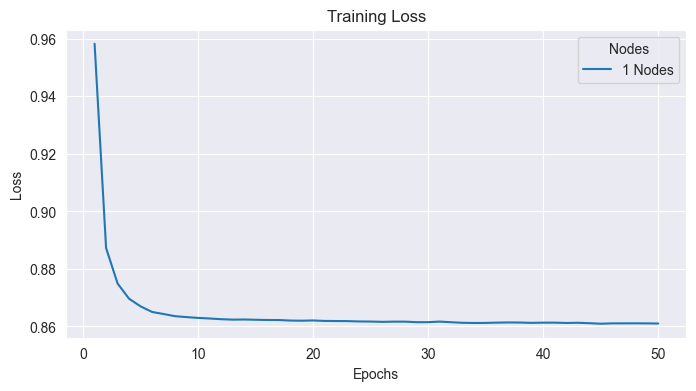

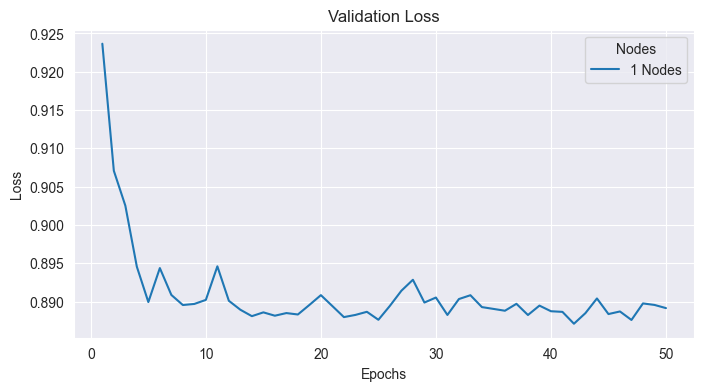

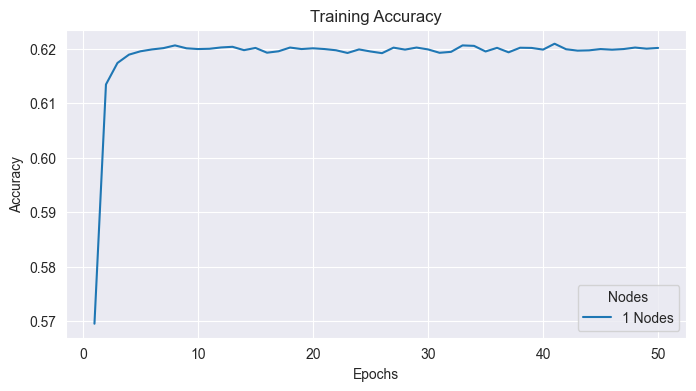

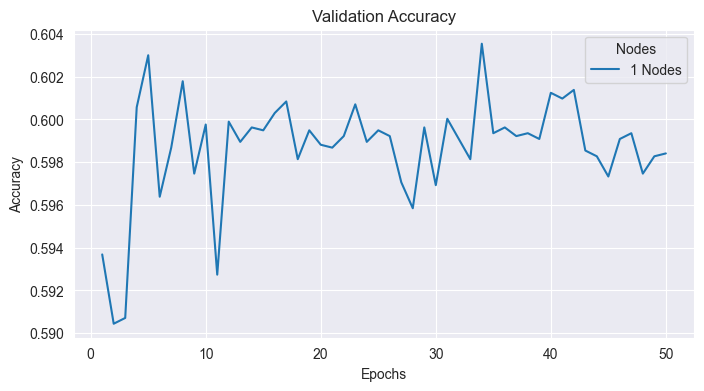

In [ ]:
# I separated the above pointed tasks as steps as can be seen in each separate code block with a numbered step in order.
#Step 1
# single node / node = 1
historyFirst = {}       #dictionary storing training history
for nodes in [1]:       #training the model
    model = Sequential([
        Input(shape=(462,)),
        Dense(nodes, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)    #training the model and storing its history
    historyFirst[nodes] = history.history               #storing history in the dictionary

def plot_metrics(metric, ylabel, title, historyInp):    #visualizing loss and accuracies with graphs
    plt.figure(figsize=(8, 4))
    for nodes, history in historyInp.items():
        sns.lineplot(x=range(1, 51), y=history[metric], label=f'{nodes} Nodes')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Nodes')
    plt.show()

#loss/epochs
plot_metrics('loss', 'Loss', 'Training Loss', historyFirst)
plot_metrics('val_loss', 'Loss', 'Validation Loss', historyFirst)
#accuracy/epochs
plot_metrics('accuracy', 'Accuracy', 'Training Accuracy', historyFirst)
plot_metrics('val_accuracy', 'Accuracy', 'Validation Accuracy', historyFirst)

- Although the loss scores are comparably low, as the accuracy in our model flattened, it underfits on the training data.  
- Also as the validation dropping compared indicates the underfitting of our single node model.  


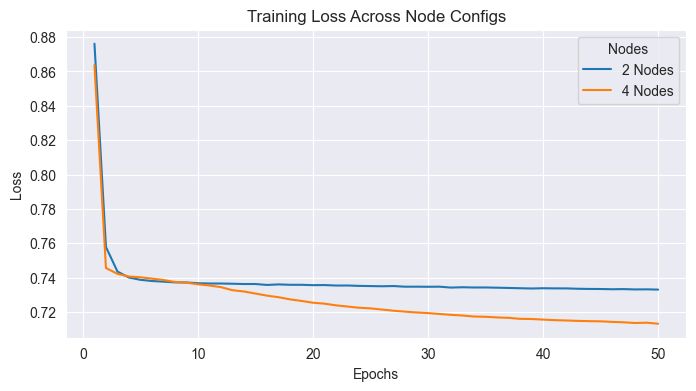

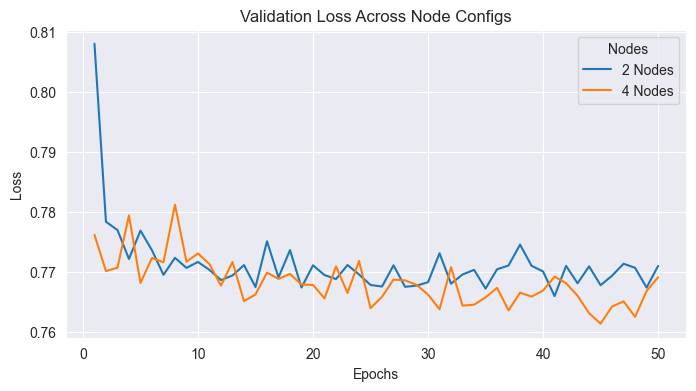

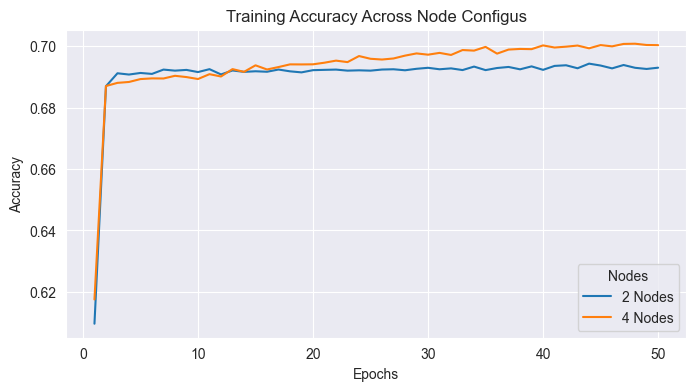

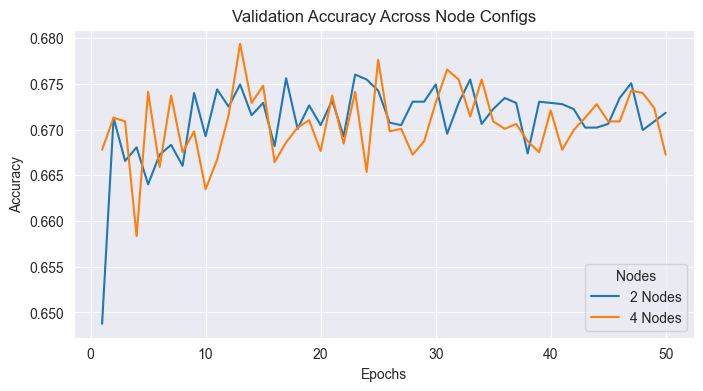

In [ ]:
#Step 2
# similar to step 1 but with  nodes 2 & 4
historySecond = {}
for nodes in [2, 4]:
    model = Sequential([
        Input(shape=(462,)),
        Dense(nodes, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
    historySecond[nodes] = history.history  

plot_metrics('loss', 'Loss', 'Training Loss Across Node Configs', historySecond)
plot_metrics('val_loss', 'Loss', 'Validation Loss Across Node Configs', historySecond)
plot_metrics('accuracy', 'Accuracy', 'Training Accuracy Across Node Configus', historySecond)
plot_metrics('val_accuracy', 'Accuracy', 'Validation Accuracy Across Node Configs', historySecond)


- Although both models have similar loss scores in both datasets, 4 Nodes model have Lower loss in both training and validation sets than 2 Nodes.
- The 4 Nodes model has a very slight increase in the Training accuracy that improves slowly in as the epochs increase, while the 2 Nodes model flattens and is underfitted. When compared for Validation accuracy, the 4 Nodes model again has a better overall score compared to 2 Nodes and both models have almost similar scores in both the Training and Validation datasets which is an optimal configuration we're looking for.


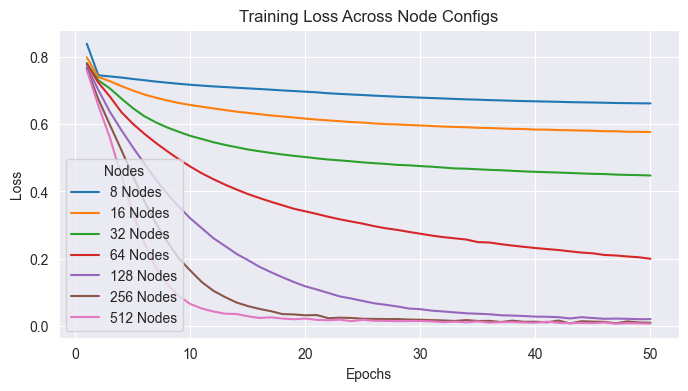

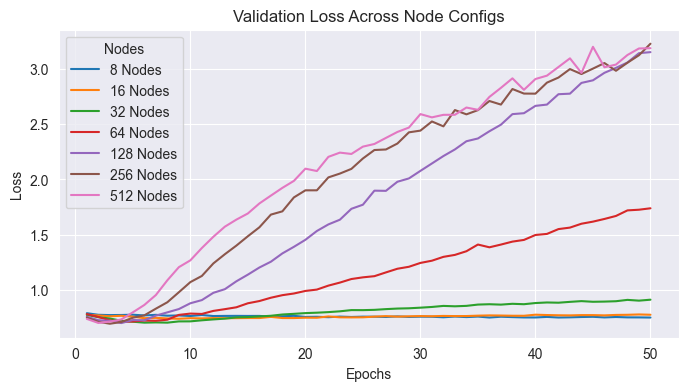

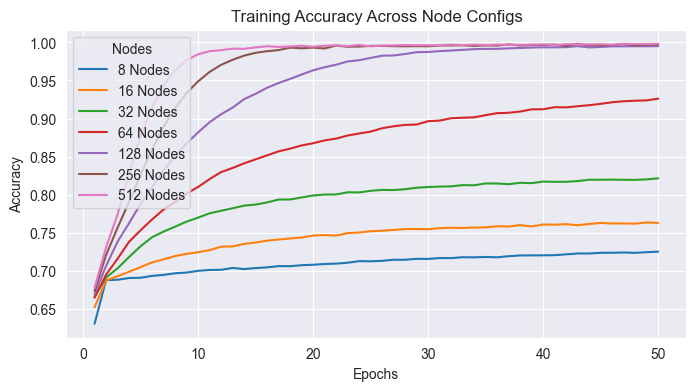

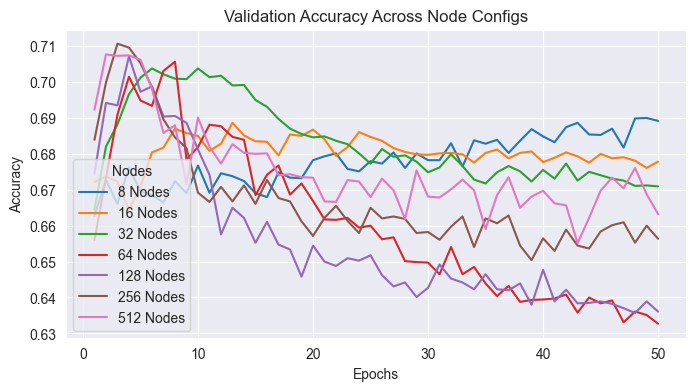

In [ ]:
#Step 3 
# starting with 8 Nodes and doubling till=512 Nodes
historyThird = {}
for nodes in [8, 16, 32, 64, 128, 256, 512]:
    model = Sequential([
        Input(shape=(462,)),
        Dense(nodes, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
    historyThird[nodes] = history.history  

plot_metrics('loss', 'Loss', 'Training Loss Across Node Configs',                   historyThird)
plot_metrics('val_loss', 'Loss', 'Validation Loss Across Node Configs',             historyThird)
plot_metrics('accuracy', 'Accuracy', 'Training Accuracy Across Node Configs',       historyThird)
plot_metrics('val_accuracy', 'Accuracy', 'Validation Accuracy Across Node Configs', historyThird)


- For the models ranging between 8 Nodes to 512 Nodes;
    - As the number of Nodes grow, the the Training Loss decreases.  
    - As the number of Nodes grow, so does the Validation Loss increases.  
    - As the number of Nodes increases, so does the Training Accuracy and overfitting increases.  
    - As the number of Nodes increases, no specific Validation Accuracy score change pattern occurs. Instead, some models decrease in accuracy while 8 Nodes model shows a close accuracy score to it's training accuracy.


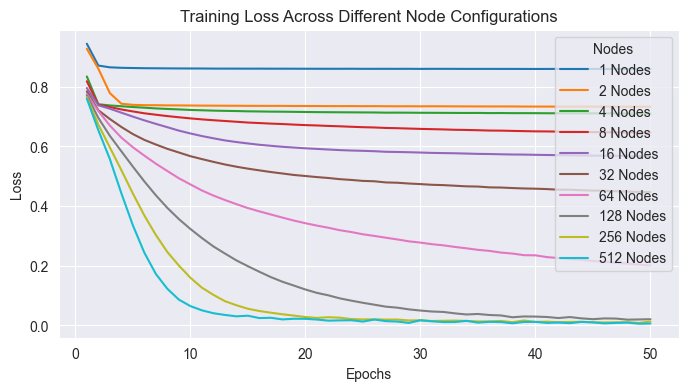

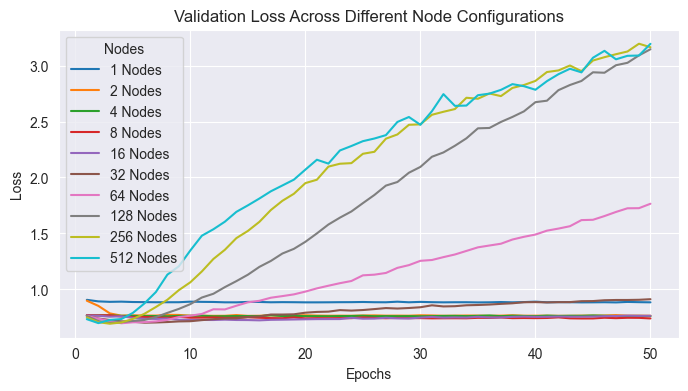

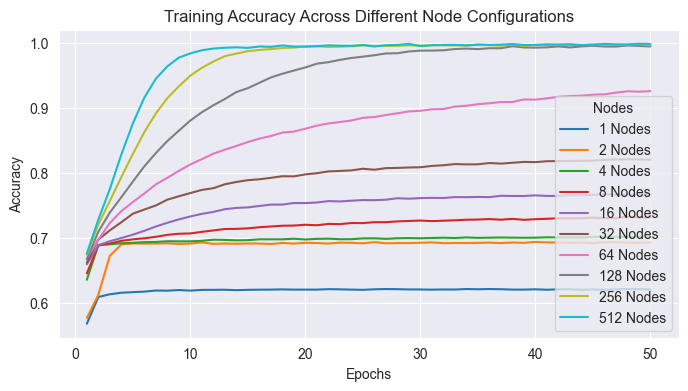

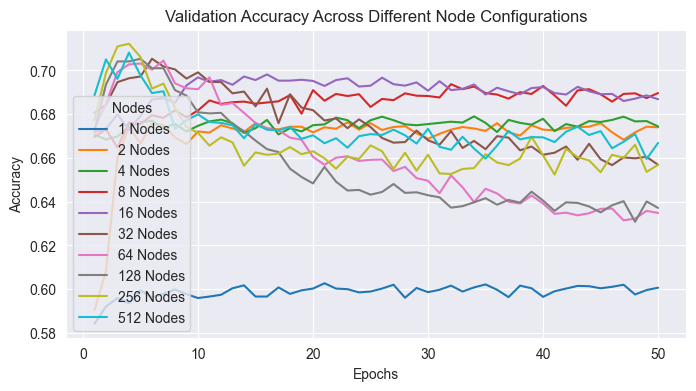

In [ ]:
historiesAll = {}
for nodes in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    model = Sequential([
        Input(shape=(462,)),
        Dense(nodes, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
    historiesAll[nodes] = history.history

plot_metrics('loss', 'Loss', 'Training Loss Across Different Node Configurations', historiesAll)
plot_metrics('val_loss', 'Loss', 'Validation Loss Across Different Node Configurations', historiesAll)
plot_metrics('accuracy', 'Accuracy', 'Training Accuracy Across Different Node Configurations', historiesAll)
plot_metrics('val_accuracy', 'Accuracy', 'Validation Accuracy Across Different Node Configurations', historiesAll)


Across testing all Node models;  
- As the number of Nodes increase, typically;  
    - the Training Loss decreases,  
    - the Training Accuracy and thus overfitting increases.  
    - Validation loss is around the similar range until Node 64, which then grows drastically as the model grows.  
    - No specific trends seems to apply for the Validation Accuracy scores as most are following atomically unique patterns except for 1 Nodes having a ~0.10 lower score than average.  
- The plateau/flat nodes underfit such as 1 Nodes visible from their accuracy scores.  
- 512, 256, & 128 Nodes overfit from their high Training but lower (almost as much as 0.25 difference) Validation accuracy scores and those nodes also have a high validation loss.  
- Visibly the optimal number of Nodes seemed to be the 8 Nodes and 32 Nodes models as for their similar(to their own) Accuracy scores accross both datasets and considerably lower Loss scores.  

- I have tested the model by adding more epochs to the testing, however, as increased epochs also increased the runtime and has not been very feasible to experiment with very long runtimes I reduced the testing number back to 50 epochs.


    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.

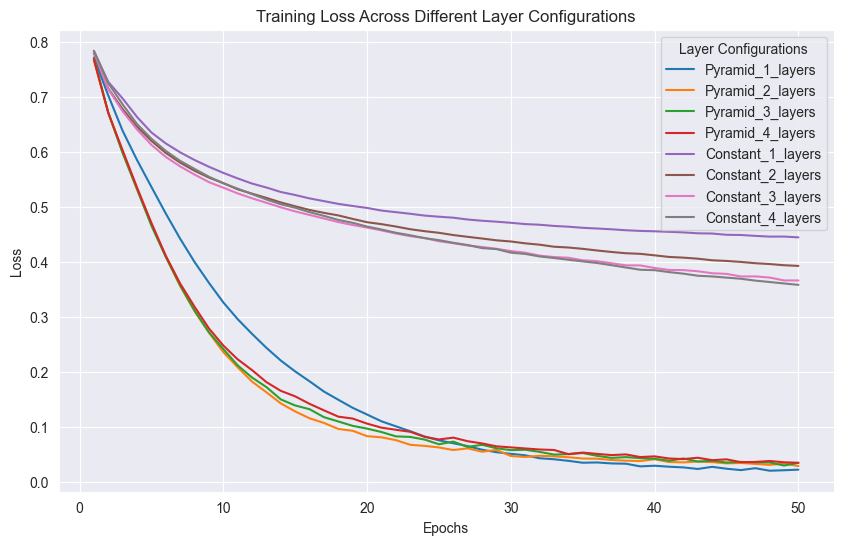

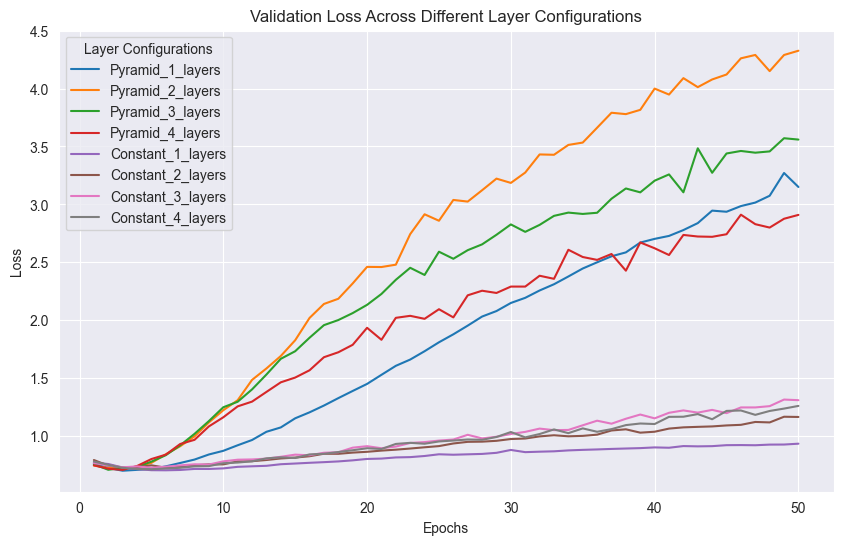

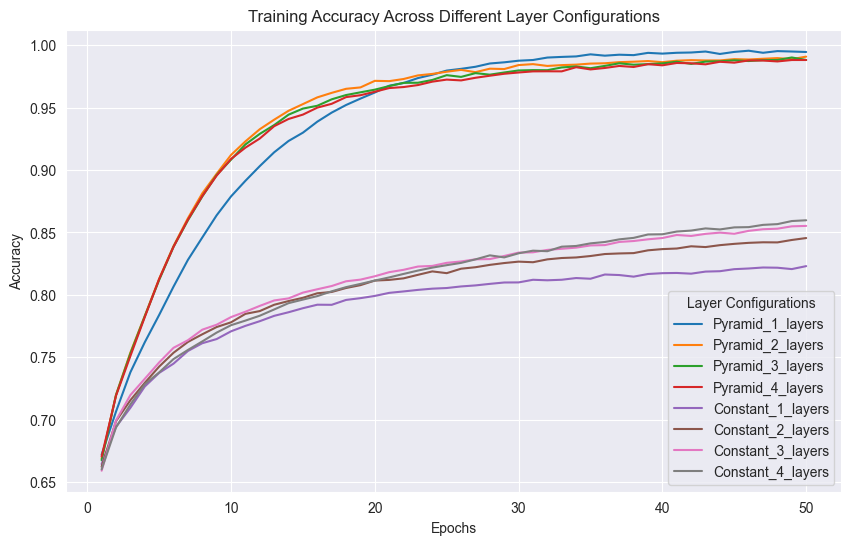

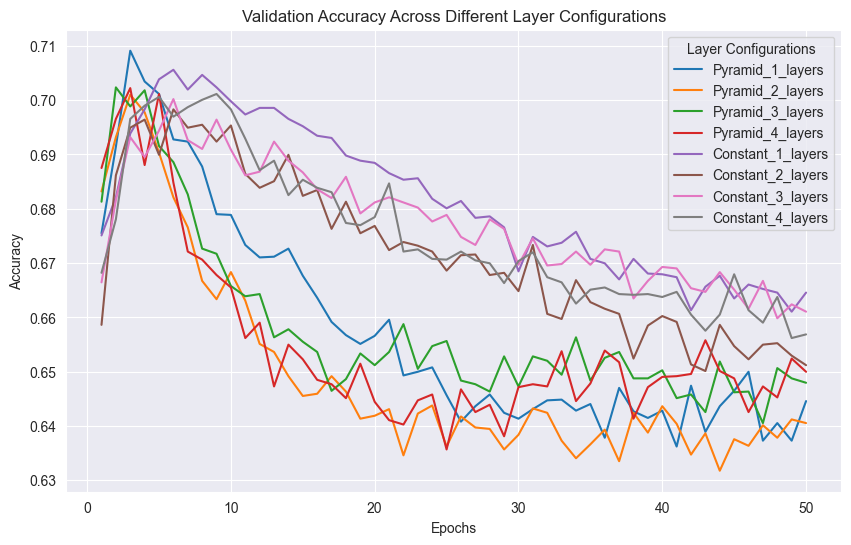

In [ ]:
layerConfigurates = {               #configurations
    'Pyramid': [128, 64, 32, 16],   #pyramid struct
    'Constant': [32, 32, 32, 32]    #constant nodes
}

historyLayers = {}
for config_name, node_counts in layerConfigurates.items():  #looping through 1 to 4 layers
    for num_layers in range(1, 5):
        model = Sequential()
        model.add(Input(shape=(462,)))
        for i in range(num_layers):                         #adding layers
            model.add(Dense(node_counts[i], activation='relu'))
        model.add(Dense(3, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
        historyLayers[f"{config_name}_{num_layers}_layers"] = history.history

#visualizing with layers
def plot_layer_metrics(metric, ylabel, title, historInp):
    plt.figure(figsize=(10, 6))
    for label, history in historInp.items():
        sns.lineplot(x=range(1, 51), y=history[metric], label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Layer Configurations')
    plt.show()

plot_layer_metrics('loss', 'Loss', 'Training Loss Across Different Layer Configurations',                   historyLayers)
plot_layer_metrics('val_loss', 'Loss', 'Validation Loss Across Different Layer Configurations',             historyLayers)
plot_layer_metrics('accuracy', 'Accuracy', 'Training Accuracy Across Different Layer Configurations',       historyLayers)
plot_layer_metrics('val_accuracy', 'Accuracy', 'Validation Accuracy Across Different Layer Configurations', historyLayers)



- I have created both the asked models as Pyramid and Constant for this part, used two models with each model varying 4 node cofigurations.  

- While the Training Loss for the Pyramid results are overall visibly lower than tha Constant layers, the results of Validation Loss is vice versa (visibly higher in Pyramid results compared to Constant results)  
    - Similarly matching the loss results, Pyramid results are very high on Training Accuracy while much lower on Validation Accuracy, which indicates overfitting.  
- The Pyramid models are overfitting as the Pyramid layers have very close accuracy to %100 (near ~%95 on the Training Accuracy), yet, much less Validation Accuracy which neither match the previous accuracy scores nor suggest a good estimation on the changed data.
- The Constant results on the other hand, are lower on the Training Accuracy and higher on Validation Accuracy compared to the Pyramid results.  
    - However, the Constant model scores are much closer to each other between both sets. compared to the pyramid results.  


    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.

In [21]:
# RELU activation
reluModel = Sequential([            #define& training with ReLU
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
reluModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reluHistory = reluModel.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)

reluResults = reluHistory.history   #storing for visualization

In [22]:
# SIGMOID activation
sigmoidModel = Sequential([         #define& training with Sigmoid
    Input(shape=(462,)),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])
sigmoidModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sigmoidHistory = sigmoidModel.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)

sigmoidResults = sigmoidHistory.history #visualization

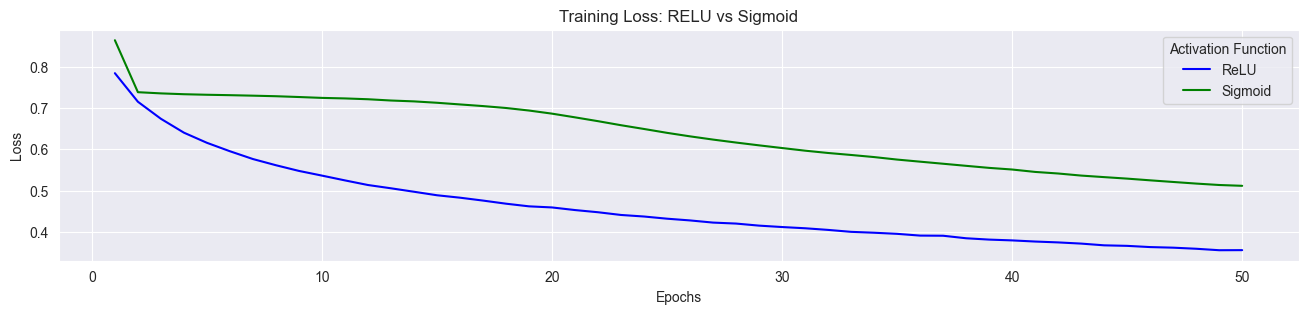

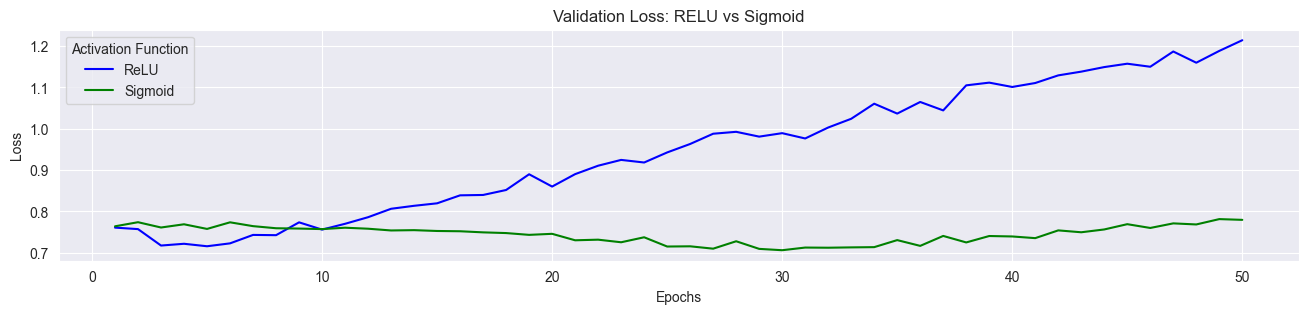

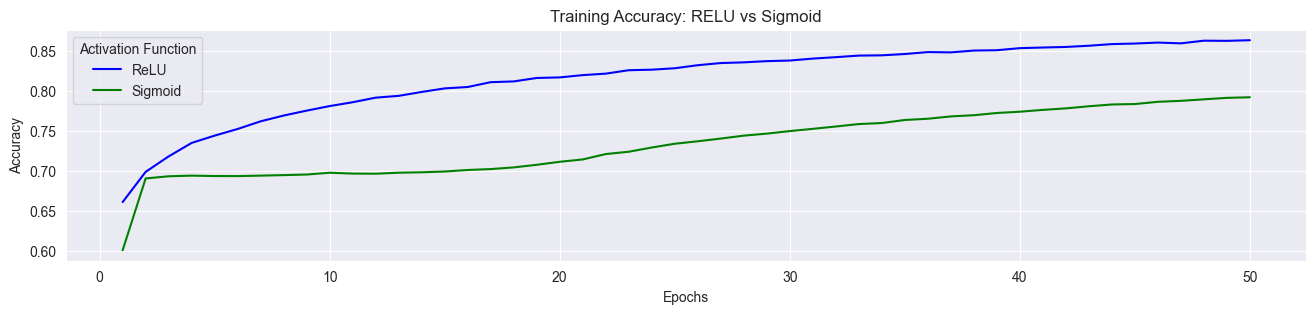

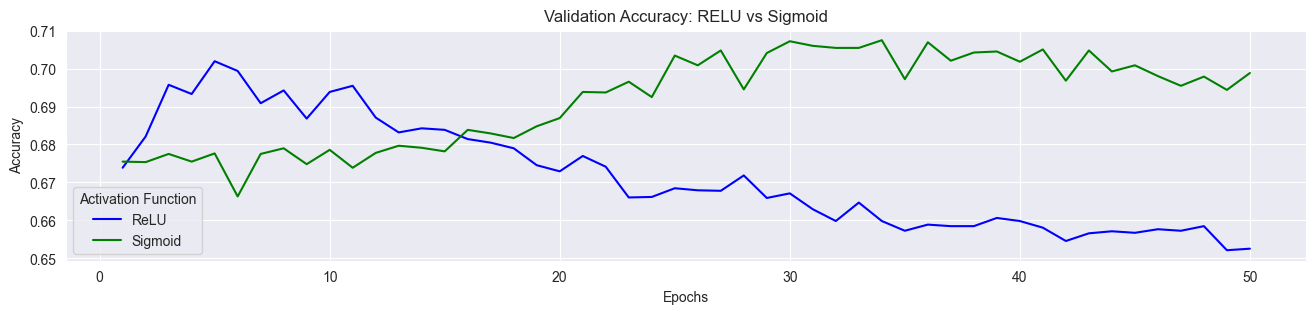

In [23]:
#visualizing& comparing both above
def plot_activation_comparison(metric, ylabel, title, relu_results, sigmoid_results):
    plt.figure(figsize=(16, 3))
    sns.lineplot(x=range(1, 51), y=relu_results[metric], label='ReLU', color='blue')        #RELU
    sns.lineplot(x=range(1, 51), y=sigmoid_results[metric], label='Sigmoid', color='green') #SIGMOID
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Activation Function')
    plt.show()

plot_activation_comparison('loss', 'Loss', 'Training Loss: RELU vs Sigmoid',                    reluResults, sigmoidResults)
plot_activation_comparison('val_loss', 'Loss', 'Validation Loss: RELU vs Sigmoid',              reluResults, sigmoidResults)
plot_activation_comparison('accuracy', 'Accuracy', 'Training Accuracy: RELU vs Sigmoid',        reluResults, sigmoidResults)
plot_activation_comparison('val_accuracy', 'Accuracy', 'Validation Accuracy: RELU vs Sigmoid',  reluResults, sigmoidResults)


When compared for each of the graphs;
- Sigmoid has a higher Training Loss than relu,
- Relu has a higher Validation Loss than Sigmoid,
while,
- Relu has a higher Training Accuracy than Sigmoid,
- for the Validation Accuracy; Relu, until near 15 epochs has a higher accuracy than sigmoid and vice versa after ~16 epochs.

These results would mean that with lower training loss and higher training accuracy(though lower Valiation Accuracy), Relu suffers from overfitting.  
And with an overall better score of training and validation loss and accuracies, closer scoring across training and validation datasets, Sigmoid seems to be a better option here.



    - **Regularization** in neural networks is a technique used to prevent overfitting.

        - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.

In [ ]:
l2Results = {}              #storing results
modelWoutL2 = Sequential([  #baseline model wout L2
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
modelWoutL2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
woutL2History = modelWoutL2.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
l2Results['No Regularization'] = woutL2History.history

l2Penalties = [0.01, 0.001, 1e-4]   #with L2
for penalty in l2Penalties:
    model_l2 = Sequential([
        Input(shape=(462,)),
        Dense(32, activation='relu', kernel_regularizer=l2(penalty)),
        Dense(32, activation='relu', kernel_regularizer=l2(penalty)),
        Dense(32, activation='relu', kernel_regularizer=l2(penalty)),
        Dense(32, activation='relu', kernel_regularizer=l2(penalty)),
        Dense(3, activation='softmax')
    ])
    model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    l2History = model_l2.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
    l2Results[f"L2 Regularization (λ={penalty})"] = l2History.history


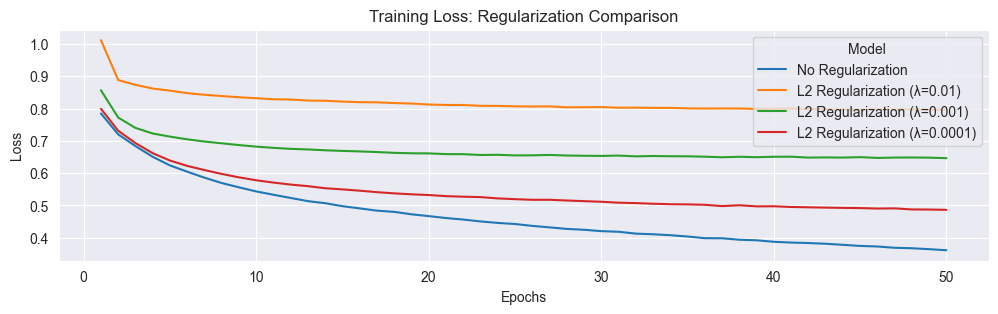

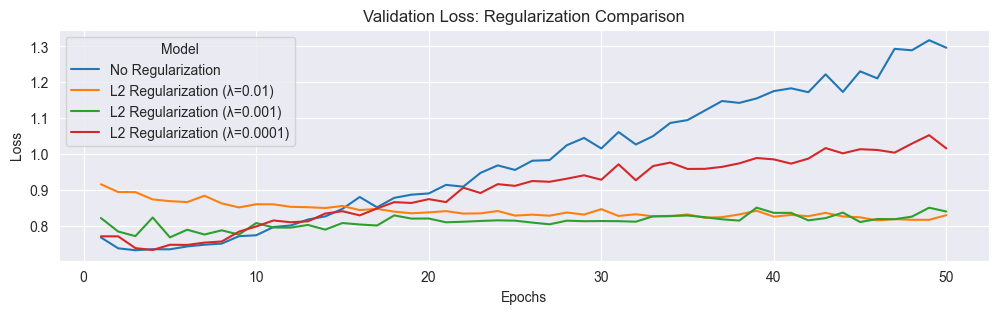

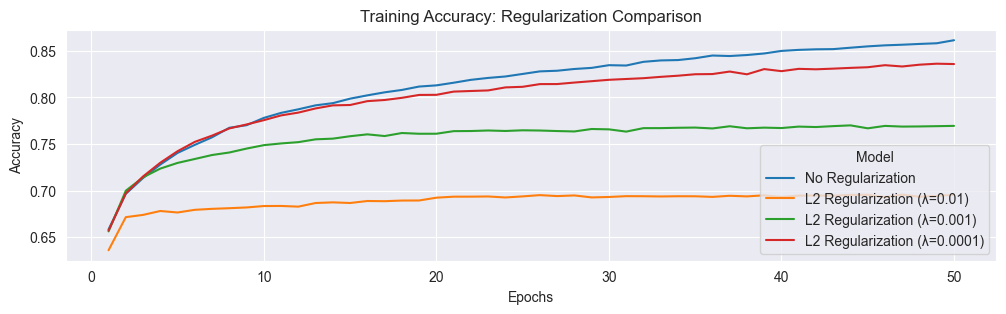

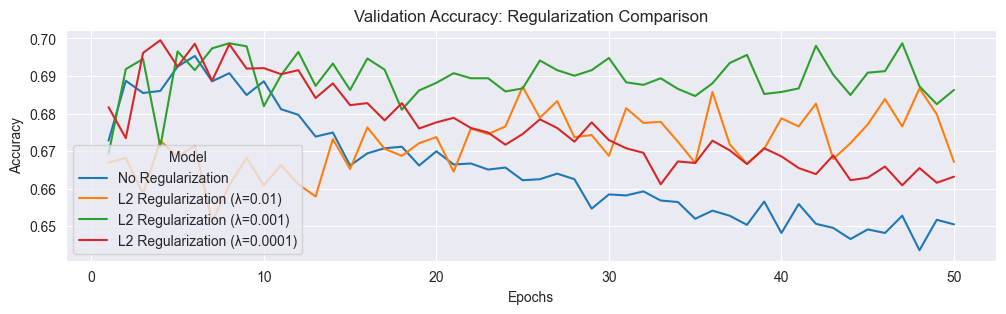

In [25]:
#visualizing for comparison
def plot_regularization_comparison(metric, ylabel, title, results_dict):
    plt.figure(figsize=(12, 3))
    for label, history in results_dict.items():
        sns.lineplot(x=range(1, 51), y=history[metric], label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Model')
    plt.show()

plot_regularization_comparison('loss', 'Loss', 'Training Loss: Regularization Comparison',                  l2Results)
plot_regularization_comparison('val_loss', 'Loss', 'Validation Loss: Regularization Comparison',            l2Results)
plot_regularization_comparison('accuracy', 'Accuracy', 'Training Accuracy: Regularization Comparison',      l2Results)
plot_regularization_comparison('val_accuracy', 'Accuracy', 'Validation Accuracy: Regularization Comparison',l2Results)


- I have applied the instructed values for penalties as 0.01, 0.001, and 1e-4 in the model.  
- I also visualized the results with the above graphs with the three l2 regularizd and no regularized models.  
    - The L2 regularized models have (except for 0.01 until ~22. epochs) resulted with a lower validation loss compared to the training loss.
    - The No Regularization model, resulted a higher training but lower validation accuracy. Thus all the models overfitted the data.
    - However, the L2 regularized models have a closer accuracy score in both training and validation, with the Model 0.001 showing the most significant reduction in overfitting on our graphs since it had the most optimized loss and accuracy scores (closer scores in both datasets) in the results. 
    - Thus looking at the closer scores across datasets for accuracy, although not completely, we have reduced our overfitting using the L2 regularization within our models.


        - Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.

In [ ]:
dropoutResults = {}                 #storing results
modelWoutDropouts = Sequential([    #base without dropout to compare
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
modelWoutDropouts.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
woutDropoutHistory = modelWoutDropouts.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
dropoutResults['No Dropout'] = woutDropoutHistory.history

modelDropout_25 = Sequential([      #dropout with 0.25
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dropout(0.25),                  #dropout layer with 0.25
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
modelDropout_25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dropoutHistory_25 = modelDropout_25.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
dropoutResults['Dropout (rate=0.25)'] = dropoutHistory_25.history

modelDropout_50 = Sequential([      #dropout with 0.5
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dropout(0.5),                   #dropout layer with 0.5
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
modelDropout_50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dropoutHistory_50 = modelDropout_50.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_data=(xValidate, yValidate), verbose=0)
dropoutResults['Dropout (rate=0.5)'] = dropoutHistory_50.history

def plot_dropout_comparison(metric, ylabel, title, results_dict):   #visualization to compare
    plt.figure(figsize=(12, 3))
    for label, history in results_dict.items():
        sns.lineplot(x=range(1, 51), y=history[metric], label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Model')
    plt.show()

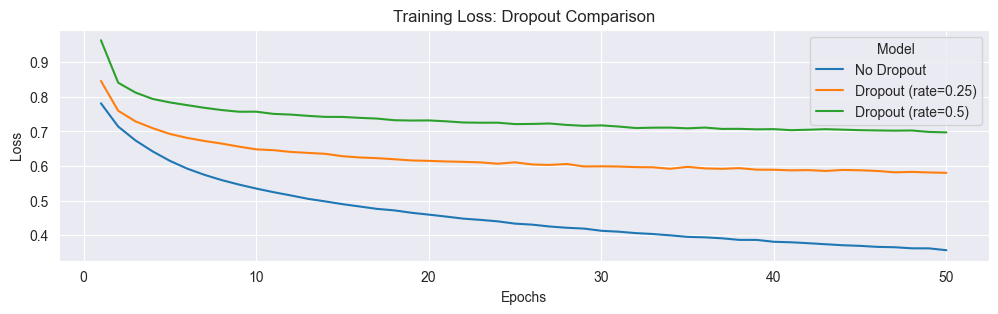

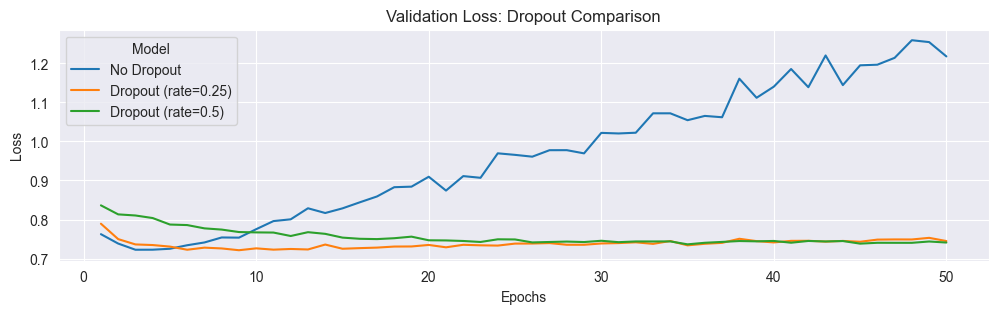

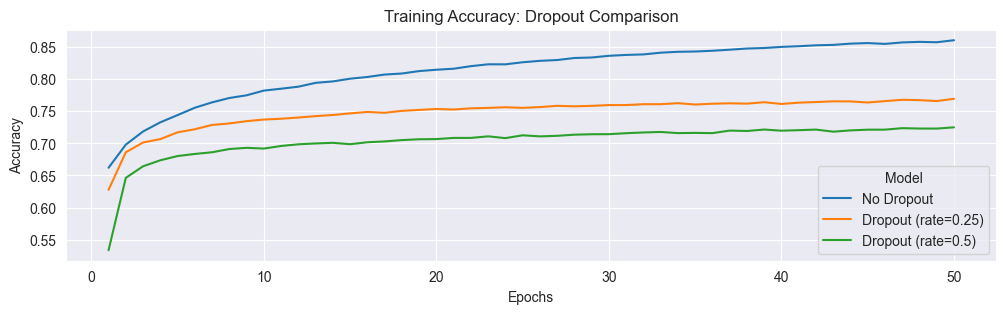

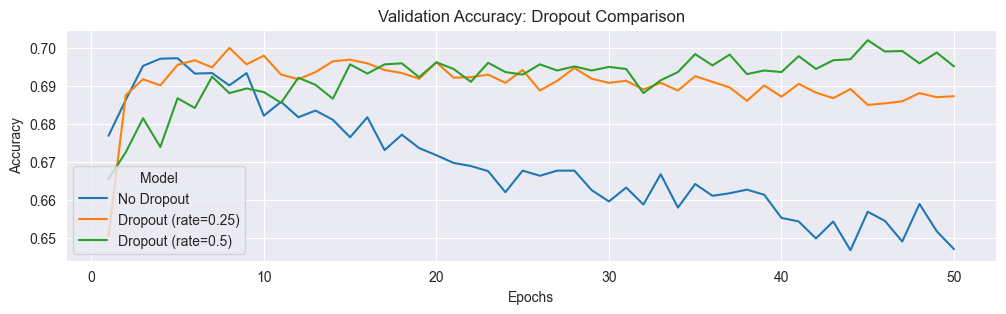

In [27]:
# visualization
plot_dropout_comparison('loss', 'Loss', 'Training Loss: Dropout Comparison',                    dropoutResults)
plot_dropout_comparison('val_loss', 'Loss', 'Validation Loss: Dropout Comparison',              dropoutResults)
plot_dropout_comparison('accuracy', 'Accuracy', 'Training Accuracy: Dropout Comparison',        dropoutResults)
plot_dropout_comparison('val_accuracy', 'Accuracy', 'Validation Accuracy: Dropout Comparison',  dropoutResults)


- I compared the Base model with no dropout to applying dropouts of 0.25 and 0.5, results are as seen in the visuals above.
    - The No Dropout Model here has no dropout layers and is used just for comparison here
    - Dropout with 0.25, adds layers after each dense layer. This rate randomly deactivates the quarter (%25) of our neurons in each layer in training
    - Dropout with 0.5, similar to above model this once deactivates half (%50) of the neurons on each layer for even bigger regularization. 

- Comparing the models on the graphs;
    - Our no dropout model performs well on the training data by overfitting but does not success in the validation data.
    - The dropout models perform similarly acroos the data, however;    
        - While the 0.25 model comparably has a lower loss score, and higher training accuracy (~%75->77) and averaging (%69-70) accuracy on the validation data, 
        - The 0.5 model performs better by having a closer accuracy score accross both datasets as %70 (slowly increasing as the epochs increase) on the training data and again %70 (just under 70, between 69 and 70) on the validation data which is optimal. We can thus say this has reduced the overfitting as it brought the accuracy scores much closer here. 


        - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

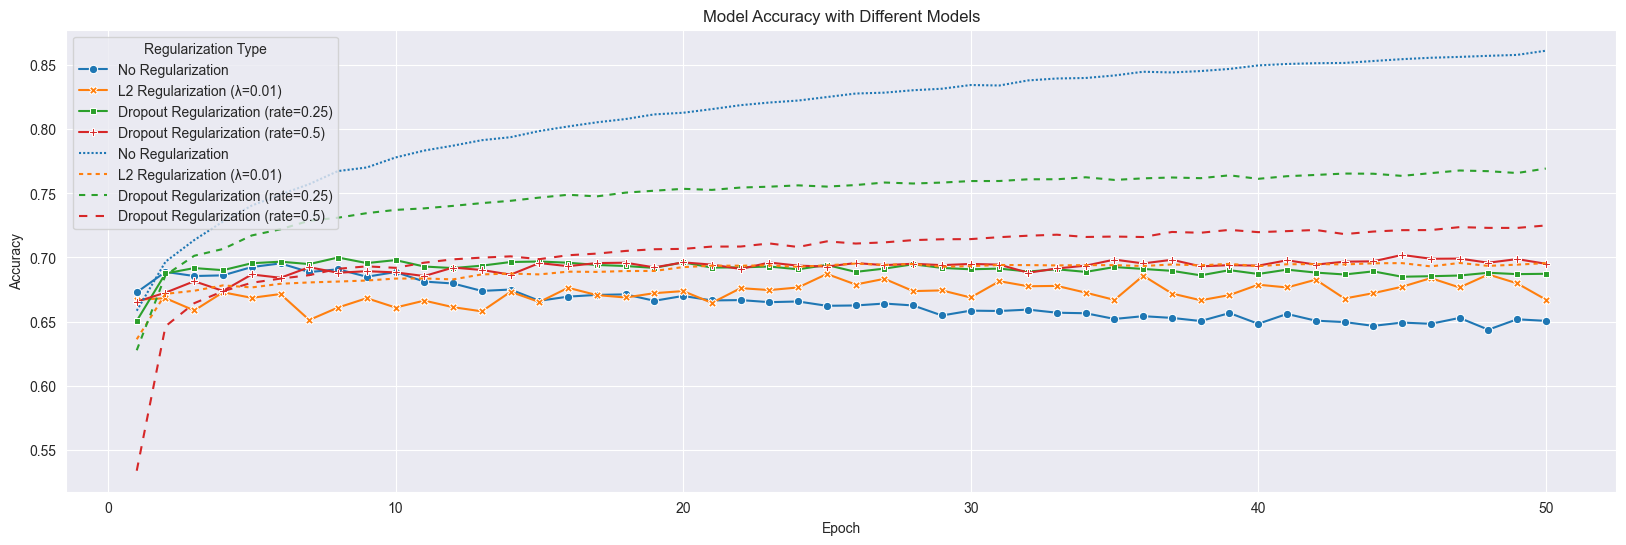

In [30]:
#combining results to DataFrame to visualize
def history2Dataframe(history, model_name, metric='accuracy', val_metric='val_accuracy'):
    epochs = range(1, len(history[metric]) + 1)
    data = {
        'Epoch': epochs,
        'Training Accuracy': history[metric],
        'Validation Accuracy': history[val_metric],
        'Model': model_name
    }
    return pd.DataFrame(data)

#converting each model
df = pd.DataFrame()
df = pd.concat([history2Dataframe(woutL2History.history, "No Regularization"),
                history2Dataframe(l2Results["L2 Regularization (λ=0.01)"], "L2 Regularization (λ=0.01)"),
                history2Dataframe(dropoutHistory_25.history, "Dropout Regularization (rate=0.25)"),
                history2Dataframe(dropoutHistory_50.history, "Dropout Regularization (rate=0.5)")],
                ignore_index=True)

#ploting our combined graphs
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Epoch', y='Validation Accuracy', hue='Model', style='Model', markers=True, dashes=False)                       #validation results
sns.lineplot(data=df, x='Epoch', y='Training Accuracy', hue='Model', style='Model', markers=False, dashes=[(1,1), (2,2), (3,3), (4,4)]) #training results
plt.title('Model Accuracy with Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title='Regularization Type', loc='upper left')
plt.show()

- Comparing the Validation and Training Accuracy scores, the models with the best reduced overfitting are; 
    - L2 with 0.01 as it's Training and Validation scores are closer to each other and around 0.67-0.68  accuracy
    - Dropout with 0.5 as it also has a closer score to of other models but with an even better score around 0.71 accuracy
- On the other hand the No regularization and Dropout with 0.25 models have a bigger gap between both scores and are not optimal. 


        - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?

In [ ]:
#defining model from findings
bestModel = Sequential([
    Input(shape=(462,)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

bestModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  #compiling model
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)          #the early stopping for monitoring validation loss

bestHistory = bestModel.fit(          #training the model with early stopping
    xTrain, yTrain,
    epochs=100,                       #100 epochs to allow early stopping work
    batch_size=32,
    validation_data=(xValidate, yValidate),
    callbacks=[earlyStopping],
    verbose=1
)

Epoch 1/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4559 - loss: 1.0275 - val_accuracy: 0.6614 - val_loss: 0.8540
Epoch 2/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.6407 - loss: 0.8582 - val_accuracy: 0.6764 - val_loss: 0.8266
Epoch 3/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.6636 - loss: 0.8158 - val_accuracy: 0.6772 - val_loss: 0.8031
Epoch 4/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.6722 - loss: 0.7979 - val_accuracy: 0.6851 - val_loss: 0.8014
Epoch 5/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.6753 - loss: 0.7918 - val_accuracy: 0.6785 - val_loss: 0.7852
Epoch 6/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.6813 - loss: 0.7778 - val_accuracy: 0.6851 - val_loss: 0.7978
Epoch 7/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.6843 - loss: 0.7744 - val_accuracy: 0.6818 - val_loss: 0.7852
Epoch 8/100
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.

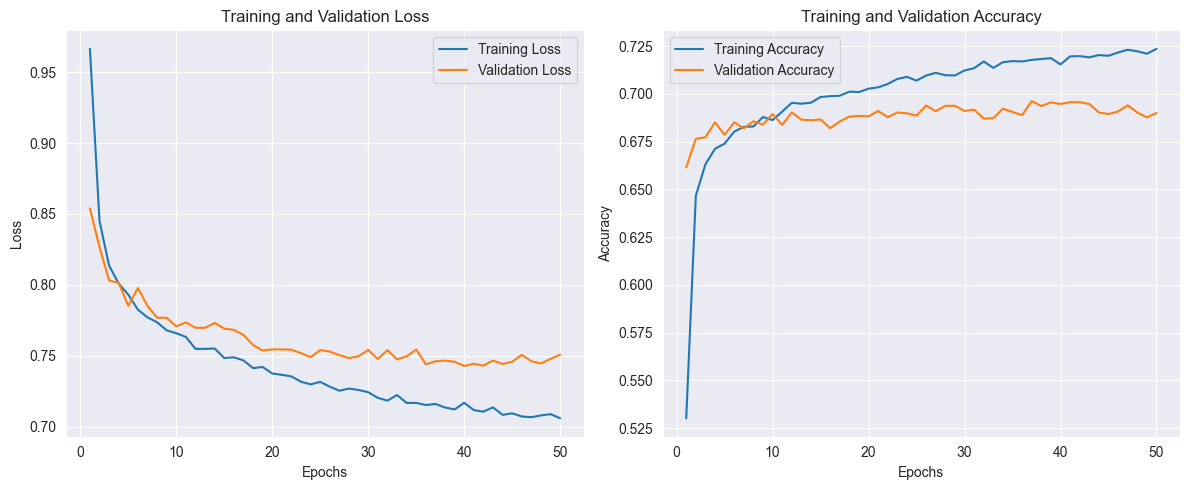

In [34]:
# visualizing
def plot_training_history(history):     #plotting the training and validation loss and accuracy
    epochs_range = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 5))

    #visualizing Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    #accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(bestHistory)     #showing history for finding optimal number of epochs from all


- I chose the Dropout model at 0.5 for this part and visualized the results on the above graphs.  
- On the Training and Validation Loss graph, the loss decline stops around the 25 epochs range(for Validation). Which would be ideal for stopping the training, however the loss continues untill epoch 50 for Training loss.  
- And on the Training and Validation Accuracy graph, the two lines are similar to the loss graph as the gap between them grow larger as the epochs increase but they share a similar increase here.
- By looking at the results, I believe the best number of epochs for this network configuration would be the epoch 20 as the loss for validation starts to plateau and as the accuracy differencce only grow after that epoch point.

### Test

9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
                          Model  Precision    Recall  F1 Score
0                   Dummy Model   0.168574  0.410577  0.239014
1        Baseline Decision Tree   0.512029  0.515812  0.512948
2  Neural Network (Dropout 0.5)   0.726988  0.726955  0.724973


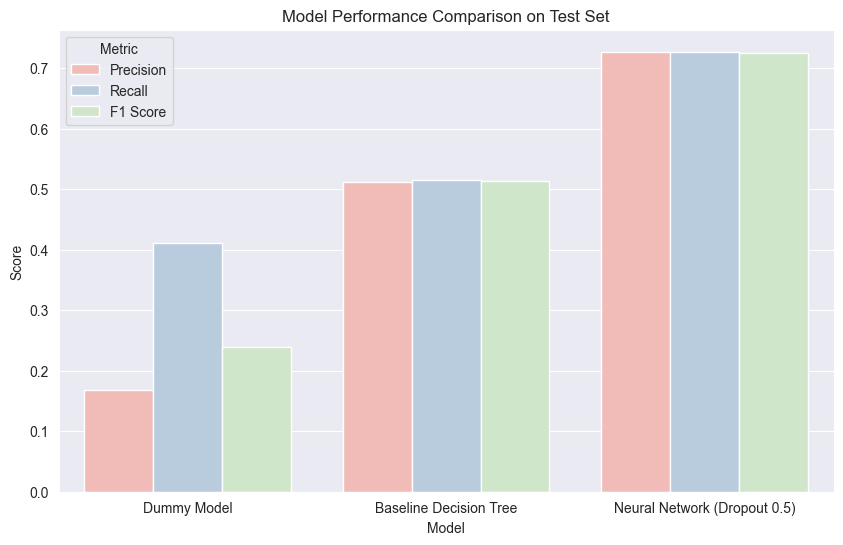

In [ ]:
#evaluating the baseLine DT model
baselinePredicts = baselineModel.predict(xTest.values)
baselinePrecision = precision_score(yTest, baselinePredicts, average='weighted', zero_division=0)
baselineRecall = recall_score(yTest, baselinePredicts, average='weighted', zero_division=0)
baselineF1 = f1_score(yTest, baselinePredicts, average='weighted', zero_division=0)

#evaluating the best Neural Network model
neurNetPredicts = bestModel.predict(xTest)
neurNetPredicts = neurNetPredicts.argmax(axis=1)  #probabilities changed into labels
neurNetPrecision = precision_score(yTest, neurNetPredicts, average='weighted', zero_division=0)
neurNetRecall = recall_score(yTest, neurNetPredicts, average='weighted', zero_division=0)
neurNetF1 = f1_score(yTest, neurNetPredicts, average='weighted', zero_division=0)

#evalutaing the dummy model
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(xTrain, yTrain)
dummyPredictions = dummy.predict(xTest)
dummyPrecision = precision_score(yTest, dummyPredictions, average='weighted', zero_division=0)
dummyRecall = recall_score(yTest, dummyPredictions, average='weighted', zero_division=0)
dummyF1 = f1_score(yTest, dummyPredictions, average='weighted', zero_division=0)

#organizing results
results = {
    "Model": ["Dummy Model", "Baseline Decision Tree", "Neural Network (Dropout 0.5)"],
    "Precision": [dummyPrecision, baselinePrecision, neurNetPrecision],
    "Recall": [dummyRecall, baselineRecall, neurNetRecall],
    "F1 Score": [dummyF1, baselineF1, neurNetF1]
}
resultsDataframe = pd.DataFrame(results)
print(resultsDataframe)

#visualizing precision, recall, and f1 scores
plt.figure(figsize=(10, 6))
results_melted = resultsDataframe.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="Pastel1") 
plt.title("Model Performance Comparison on Test Set")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

The result of comparing the Dummy, Baseline (decisionTree), and Neural Network(with 0.5 dropout) has resulted as follows;
|Score                            |Dummy Model| BaseLine DecisionTree Model | Nerual Network Mode(0.5)|
|:--------------------------------|:---------:|:---------------------------:|:-----------------------:|
|   Precision                     |0.168574   | 0.512029                    | 0.726988                |
|   Recall                        |0.410577   | 0.515812                    | 0.726955                |
|   F1 Score                      |0.239014   | 0.512948                    | 0.724973                |

- The two models compared to the dummy model have a considerably better score overall in all three metrics of Precision, Recall, and F1 scores.
    - The DecisionTree model have around %51 score on all three of it's metrics, almost twice of the dummy model.
    - The Neural Network model has even greater scores, around %72 in all three metrics, being the highest scored model across the three.
- Considering the analysis results and the visible difference in the scoring of the three models, I believe the best model to continue with is the Neural Network (0.5 dropout) model here.

<!-- |Model                            |Precision| Recall   | F1 Score|
|:--------------------------------|:-------:|:--------:|:-------:|
|   Dummy Model                   |0.168574 | 0.410577 | 0.239014 |
|   Baseline Decision Tree        |0.512029 | 0.515812 | 0.512948 |
|   Neural Network (Dropout 0.5)  |0.726988 | 0.726955 | 0.724973 | -->


# Resources

Below are the resources I followed while working on this assignment.  
I have also revisited some of the resources from my previous assignments.  
https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows    
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html  
https://keras.io/guides/  
https://www.tensorflow.org/  
https://stackoverflow.com/questions/63954939/how-to-apply-scaling-to-selected-features-when-using-scaling-in-a-pipeline  
https://stackoverflow.com/questions/42338972/valueerror-feature-names-mismatch-in-xgboost-in-the-predict-function  
https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/#:~:text=You%20can%20control%20the%20colors,a%20parameter%20to%20set_palette%20function.  
https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html  
https://github.com/dvgodoy/dl-visuals/  
https://medium.com/pythons-gurus/building-and-training-a-neural-network-with-pytorch-a-step-by-step-guide-958a859a1f16  
https://medium.com/@sanjay_dutta/how-to-calculate-precision-recall-f1-confusion-matrix-roc-auc-for-deep-learning-models-00f20e7af7cb  



